In [621]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../include/")
import hhtools

In [622]:
import importlib
importlib.reload(hhtools)

<module 'hhtools' from '/Users/jungyoung/Desktop/codes/Project/HHnetwork/two_pop/../include/hhtools.py'>

In [570]:
N = 1000
vs_s, ts = hhtools.load_dynamics("./tmp/v_out.dat", N, fs=2000)
step_spks, nmax = hhtools.load_spk("./tmp/spk.dat")
vlfps = hhtools.load_vlfp("./tmp/lfp.dat")

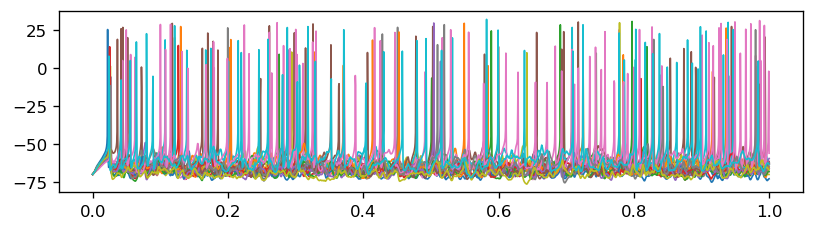

In [571]:
plt.figure(dpi=120, figsize=(8, 2))
plt.plot(ts, vs_s[:,:20], lw=1)
plt.show()

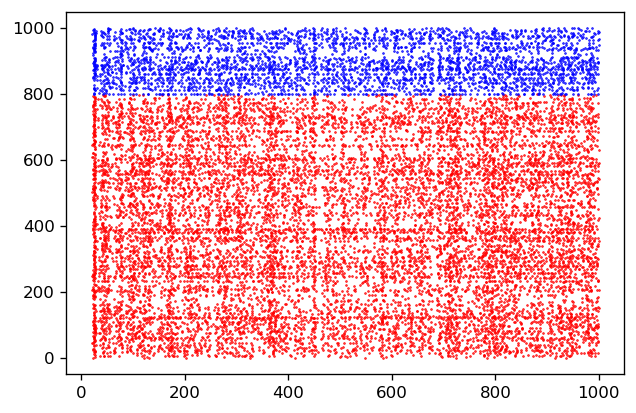

In [572]:
N = len(step_spks)
plt.figure(dpi=120, figsize=(6, 4))
hhtools.draw_spk(step_spks, dt=0.01, color_ranges=(N*0.8, N), colors=["r", "b"])

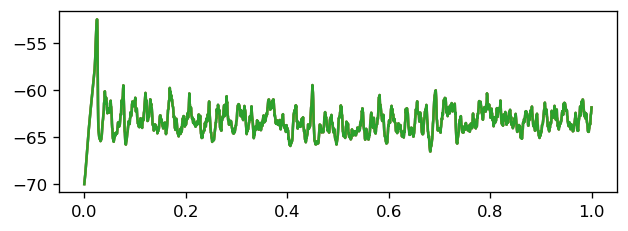

In [573]:
plt.figure(dpi=120, figsize=(6, 2))
plt.plot(ts, vlfps[0])
plt.plot(ts, vlfps[1])
plt.plot(ts, vlfps[2])
plt.show()

In [623]:
ntk_e, ntk_we = hhtools.load_network("./tmp/ntk_e.txt")
ndeg_e_in = [len(d) for d in ntk_e]

# ntk_i = hhtools.load_network("./tmp/ntk_o.txt")
# ndeg_i_in = [len(d) for d in ntk_i]

In [612]:
nid = 2
print(ndeg_e_in[nid], ndeg_i_in[nid])

33 14


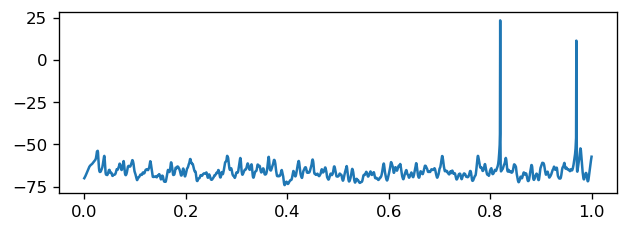

In [620]:
# id
plt.figure(dpi=120, figsize=(6, 2))
plt.plot(ts, vs_s[:, 900])
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5000 but corresponding boolean dimension is 2000

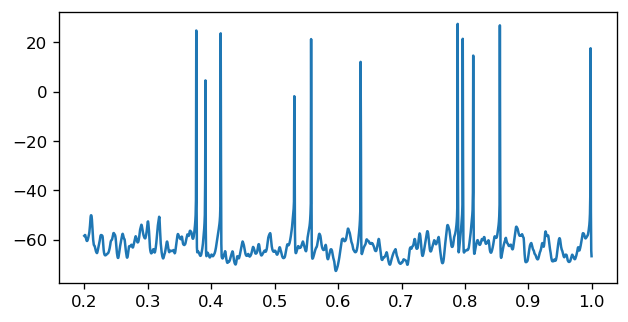

In [575]:
nid = 50

idt = ts >= 0.2

plt.figure(dpi=120, figsize=(6, 3))
plt.plot(ts[idt], vs_s[idt, nid])
plt.plot(ts[idt], vs_f[idt, nid])
plt.show()

## Check result

In [470]:
N = 1000
with open("./tmp/v_out.dat", "rb") as fid:
    vs = np.fromfile(fid, dtype=np.float32).reshape([-1, N])
V = np.average(vs, axis=1)

In [450]:
sV = np.var(V)
sv = np.var(vs, axis=0)
print(np.sqrt(sV/np.average(sv)))

0.77499527


In [451]:
vs_sub = vs[:,:800]
V = np.average(vs_sub, axis=1)
sV = np.var(V)
sv = np.var(vs_sub, axis=0)
print(np.sqrt(sV/np.average(sv)))
print(sV, np.average(sv))

0.7835463
9.345982 15.222836


In [437]:
vs_sub = vs[:,800:]
V = np.average(vs_sub, axis=1)
sV = np.var(V)
sv = np.var(vs_sub, axis=0)
print(np.sqrt(sV/np.average(sv)))

0.8489462144908293


In [420]:
with open("./tmp/v_out.dat", "rb") as fid:
    vs = np.fromfile(fid, dtype=np.float32).reshape([-1, N])

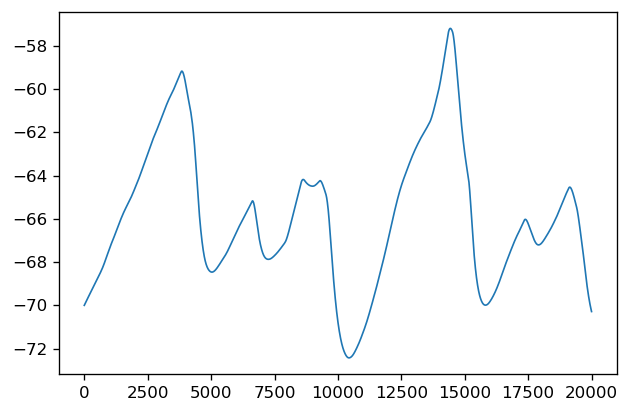

In [421]:
plt.figure(dpi=120, figsize=(6, 4))
plt.plot(vs[:,990], lw=1)
# print(plt.ylim())
plt.show()

In [452]:
V = np.average(vs, axis=1)
vs_sub1 = np.average(vs[:,:800], axis=1)
vs_sub2 = np.average(vs[:,800:], axis=1)

# id, cum_step, num_class[id], v_avg1_tot, v_avg2_tot);

In [453]:
with open("./tmp_spk.dat", "rb") as fid:
    data = np.fromfile(fid, dtype=np.int32)
N, nmax = data[0], data[1]
num_spk = data[2:N+2]
step_spks = []
cum = N+2
for n in range(N):
    step_spks.append(data[cum:cum+num_spk[n]])
    cum += num_spk[n]

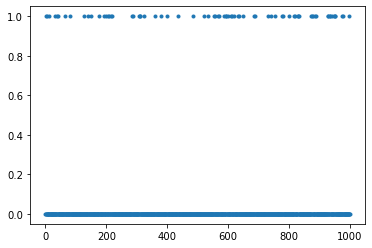

In [454]:
plt.plot(num_spk, '.')

In [455]:
np.average(num_spk)

0.074

In [426]:
frs = num_spk * 10

In [427]:
np.std(frs)

2.617708921939183

In [428]:
np.std(num_spk[800:])

0.31288975694324034

In [457]:
cvs = []
dt = 0.01
for n in range(N):
    if num_spk[n] < 3:
        continue
    t = np.array(step_spks[n]) * dt/1000
    delt = t[1:] - t[:-1]
    m = np.average(delt)
    s = np.std(delt)
    cvs.append(s/m)
print(np.average(cvs))

nan


In [468]:
with open("./tmp_lfp.dat", "rb") as fid:
    data = np.fromfile(fid, dtype=np.float32)
ntypes, max_step = int(data[0]), int(data[1])
vlfp = data[2:max_step+2]

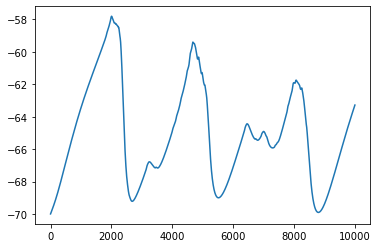

In [469]:
plt.plot(vlfp)

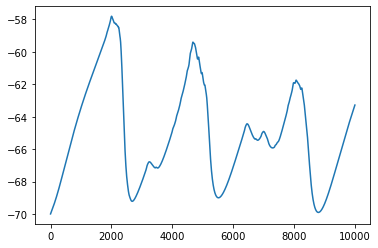

In [472]:
plt.plot(np.average(vs, axis=1))

In [473]:
vs.shape

(10000, 1000)

In [462]:
data.shape

(30002,)

In [463]:
data[0]

2.0

In [464]:
data[1]

10000.0

In [ ]:
vlfp1 = data[2:100

In [460]:
data[1]

10000.0